In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import cairo

In [108]:
def generate_images_with_bboxes(num_imgs=1, img_size=32, min_object_size=8, max_object_size=16, num_objects=2):
    bboxes = np.zeros((num_imgs, num_objects, 4))
    imgs = np.zeros((num_imgs, img_size, img_size, 4), dtype=np.uint8)
    shapes = np.zeros((num_imgs, num_objects), dtype=int)
    num_shapes = 3
    colors = np.zeros((num_imgs, num_objects), dtype=int)
    num_colors = 3

    for img_ in range(num_imgs):
        surface = cairo.ImageSurface.create_for_data(imgs[img_], cairo.FORMAT_ARGB32, img_size, img_size)
        cr = cairo.Context(surface)
        # Background is white
        cr.set_source_rgb(1, 1, 1)
        cr.paint()
        for object_ in range(num_objects):
            shape = np.random.randint(num_shapes)
            shapes[img_, object_] = shape
            
            if shape == 0:
                # rectangle
                w, h = np.random.randint(min_object_size, max_object_size, size=2)
                x = np.random.randint(0, img_size - w)
                y = np.random.randint(0, img_size - h)
                bboxes[img_, object_] = [x, y, w, h]
                cr.rectangle(x, y, w, h)            
            elif shape == 1:
                # circle
                r = 0.5 * np.random.randint(min_object_size, max_object_size)
                x = np.random.randint(r, img_size - r)
                y = np.random.randint(r, img_size - r)
                bboxes[img_, object_] = [x - r, y - r, 2 * r, 2 * r]
                cr.arc(x, y, r, 0, 2*np.pi)
            else:
                # triangle
                w, h = np.random.randint(min_object_size, max_object_size, size=2)
                x = np.random.randint(0, img_size - w)
                y = np.random.randint(0, img_size - h)
                bboxes[img_, object_] = [x, y, w, h]
                cr.move_to(x, y)
                cr.line_to(x + w, y)
                cr.line_to(x + w, y + h)
                cr.line_to(x, y)
                cr.close_path()

            color = np.random.randint(num_colors)
            colors[img_, object_] = color
            rgb = [0, 0, 0]
            rgb[color] = 1
            # Add some randomness to color at some point - Not critical for now though
            cr.set_source_rgb(rgb[0], rgb[1], rgb[2])
            cr.fill()
    
    imgs = imgs[..., 2::-1]  # is BGRA, convert to RGB
    
    return imgs, bboxes, shapes, colors

In [99]:
def display_image_with_bboxes(image, bboxes, shapes, colors):
    shape_labels = ['rectangle', 'circle', 'triangle']
    color_labels = ['r', 'g', 'b']
    plt.imshow(image, origin='lower', extent=[0, 32, 0, 32])
    for bbox, shape, color in zip(bboxes, shapes, colors):
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='k', fc='none'))
        plt.annotate(shape_labels[shape], (bbox[0], bbox[1] + bbox[3] + 0.7), color=color_labels[color], clip_on=False)

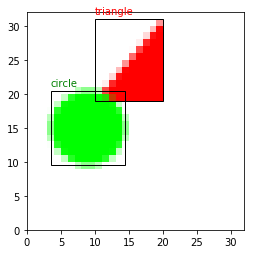

In [107]:
imgs, bboxes, shapes, colors = generate_images_with_bboxes(num_imgs=2)
display_image_with_bboxes(imgs[0], bboxes[0], shapes[0], colors[0])